# CRISP DM methodology in analysing AirBnb Toronto data

## 1. Business Understanding


I am going to use AirBnB Toronto data to analyse the following questions that might be of interest to travellers planning to visit Toronto.

1. When is it most economical to visit Toronto?

2. Where do I stay, what all options do I have?

3. What all amenities should I be expecting?

4. In general, what all factors are driving the price?

Through this notebook, we will try to find out the answers for these questions

## 2. Data Understanding

For the purpose of study, we have sourced Airbnb Toronto data for period Apr’20- Apr’21. We got 3 sets of data files. 

1. Listings -- provides information like (description, price, location, host info, amenities etc.). 
2. Calendar -- provides information on (date, availability, price) 
3. Reviews -- contains information on (date of review, reviews by users etc.). 


Let us take a look at all 3 datasets in detail.
First let us import all the required packages.

In [1]:
#Import required libraries

import pandas as pd 
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
# All the modules required for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [2]:
#Reading calendar data
calendar = pd.read_csv("F:\\HP_Backup\\Udacity\\Term2\\Toronto_data\\calendar.csv")
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,314459,2020-04-10,t,$52.00,$52.00,3.0,100.0
1,314934,2020-04-11,t,$85.00,$85.00,2.0,1125.0
2,314934,2020-04-12,t,$85.00,$85.00,2.0,1125.0
3,314934,2020-04-13,t,$85.00,$85.00,2.0,1125.0
4,314934,2020-04-14,t,$85.00,$85.00,2.0,1125.0


In [4]:
#Reading listings data
listings = pd.read_csv("F:\\HP_Backup\\Udacity\\Term2\\Toronto_data\\listings.csv")
listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20200409152508,2020-04-10,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",All forms of public transportation are easily ...,The whole house and garden are available.,"We will be out of town, but fully accessible b...",This is our much-loved family home. We expect ...,NaN,NaN,https://a0.muscache.com/im/pictures/76206750/d...,NaN,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Toronto, Ontario, Canada","I live in Toronto, Canada with my husband and ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1565/profile_...,https://a0.muscache.com/im/users/1565/profile_...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, ON, Canada",Little Portugal,Little Portugal,NaN,Toronto,ON,M6J,Toronto,"Toronto, Canada",CA,Canada,43.64617,-79.42451,f,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",1400.0,$469.00,"$2,000.00",NaN,"$1,000.00",$150.00,1,$0.00,4,730,4,4,730,730,4.0,730.0,27 months ago,t,0,0,0,0,2020-04-10,7,0,2015-07-19,2017-12-04,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.12


In [5]:
#Reading reviews data
reviews = pd.read_csv("F:\\HP_Backup\\Udacity\\Term2\\Toronto_data\\reviews.csv")
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1419,38924112,2015-07-19,11308465,Marcela,Having the opportunity of arriving to Alexandr...
1,1419,44791978,2015-08-29,9580285,Marco,We have no enough words to describe how beauty...
2,1419,45957133,2015-09-07,38394721,Andrea,The listing was exceptional and an even better...
3,1419,67295154,2016-03-28,3515044,Shaun,Alexandra's home was amazing and in such a nea...
4,1419,177702208,2017-08-03,13987100,Kate,Beautiful home. Very comfortable and clean. Pe...


In [6]:
print("No. of rows and columns in each data file is as below",  "\n",
      "Calendar : ", calendar.shape, "\n",
      "Listings : ", listings.shape, "\n",
      "Reviews : ", reviews.shape,)

No. of rows and columns in each data file is as below 
 Calendar :  (8185348, 7) 
 Listings :  (22425, 106) 
 Reviews :  (641502, 6)


Let's try to see if we can come up with solutions for some of the questions now.

Primarily we will be using "Calendar" & "Listings" data to drive our analysis, but "Reviews" data can be used to explore many other interesting aspects, for example- We can do a sentimental analysis on the review comments and analyse its impact on price or future listings,ratings etc.

Let us look at the first question

### 1. When is it most economical to visit Toronto this year?

To find the answer to this question, lets revisit the calendar data.

In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8185348 entries, 0 to 8185347
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 437.1+ MB


We can see that we have to do some conversions -- price column to numeric by removing $ signs and also separate month and year from the date column

In [8]:
#creating year, month, weekday and combination of month and year as month_year from the date column
calendar['year'] = pd.to_datetime(calendar['date']).dt.year
calendar['month'] = pd.to_datetime(calendar['date']).dt.month
calendar['weekday'] = pd.to_datetime(calendar['date']).dt.dayofweek
calendar['month_year'] = pd.to_datetime(calendar['date']).dt.to_period('M')


In [9]:
#converting price column to a numeric column
calendar['price'] = pd.to_numeric(calendar['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')


Now let us check the average price per month to see which month is costly and which month is cheaper etc.

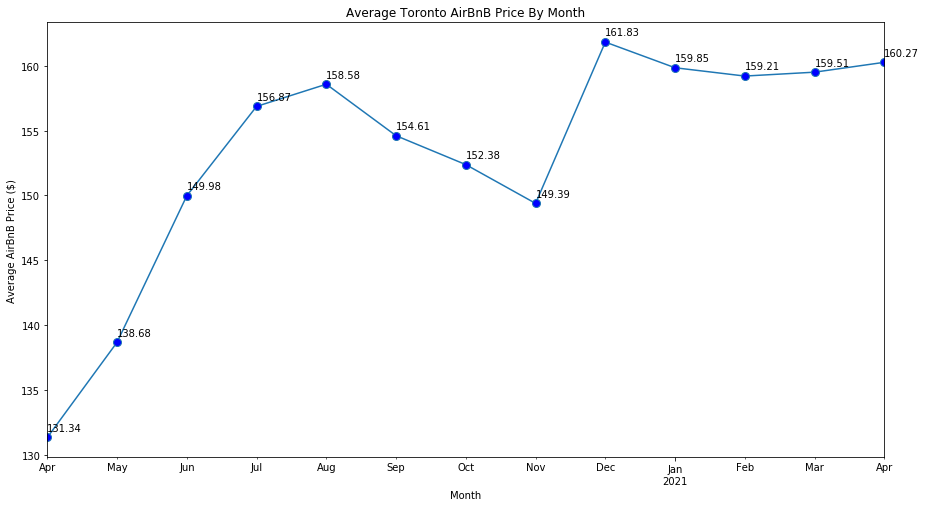

In [10]:
avg_price_per_month = round(calendar.groupby(['month_year']).mean()['price'],2)
ax = avg_price_per_month.plot(kind='line', title='Average Toronto AirBnB Price By Month',marker='o',markerfacecolor='blue', markersize=8,figsize=(15,8));
ax.set(xlabel='Month', ylabel='Average AirBnB Price ($)');
for mon,price in avg_price_per_month.items():
    ax.annotate(str(price), xy=(mon, price),xytext=(mon,price+0.5))

From the above chart, we can see that Apr2020 and May2020 are having lowest prices, but we dont find this as a general trend, as Apr'2021 is priced way above at 160. So, it might not be out of order to assume that current Corona Pandemic & associated lockdown migth be a probable reason for such cheaper prices. In current scenario, June and November are listed at the lowest price of around $150. December is the costliest, which is understandable as it is the Holiday season.

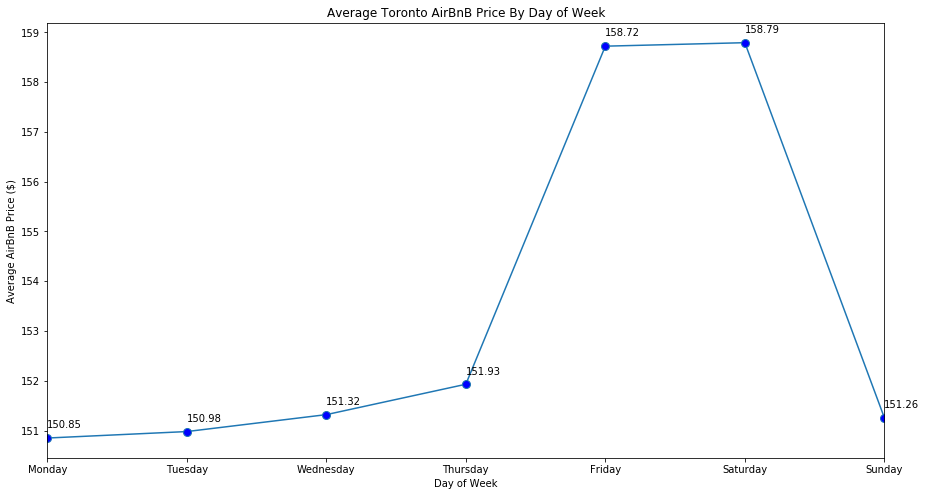

In [11]:
avg_price_per_weekday = round(calendar.groupby(['weekday']).mean()['price'],2)
ax = avg_price_per_weekday.plot(kind='line', title='Average Toronto AirBnB Price By Day of Week',marker='o', markerfacecolor='blue', markersize=8,figsize=(15,8));
ax.set(xlabel='Day of Week', ylabel='Average AirBnB Price ($)');
ax.set(xticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);
for wk,price in avg_price_per_weekday.items():
    ax.annotate(str(price), xy=(wk, price),xytext=(wk,price+.2))

From the above we can see that days leading to weekend are the costliest. i.e, Friday's and Saturday's. Working days are cheaper.

--------------------------------------------------------------------------------------
So coming back to our question, **"When is it most economical to visit Toronto?"**

From the above two charts we can see that if anybody is planning to visit Toronto this year, they can plan for June or November, as they are cheaper. Also weekdays are cheaper(excluding Friday)

---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------

Now let's move on to our next question

### 2. Where do I stay, what all options do I have?


**"Listings"** data might be a good start point to address this query.

We have 22425 AirBnb listings in Toronto. We can check out to see how they are spread across different neighbourhoods in Toronto.

To start with, we can take a look at the room_type column that shows the different type of rooms available with each Listing.

In [12]:
listings['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

We can see that there are 4 different room types available. Now let us to see what is the distribution of different room types across different neighbourhoods.

Let us use a Folium map to create an interactive map of Toronto to get the details of all listings.

In [13]:
#To get the latitude and longitude of Toronto
address = 'Toronto, ON'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [14]:
#creating the map of Toronto with name of the listing, room_types and price as pop ups, also to show what type of listings we have --Entire home/apt , Private rooms etc
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

def color(room_type): 
    if room_type == "Entire home/apt": 
        col = 'orange'
    elif room_type == "Private room": 
        col = 'green'
    elif room_type == "Shared room": 
        col = 'blue'
    else: 
        col='black'
    return col
for lat, lng, name, price, neighborhood,room_type in zip(listings['latitude'], listings['longitude'], listings['name'], listings['price'],listings['neighbourhood_cleansed'],listings['room_type']):
    label = '{}, {}, {}'.format(name, room_type, price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color=color(room_type),
        fill=True,
        fill_color=color(room_type),
        fill_opacity=0.9,
        parse_html=False).add_to(map_Toronto)
map_Toronto.save('map_Toronto.html')            
map_Toronto

Above shown Interactive Map provides us information like, Listing Name, Room Type & Price. A basic information like this is a good starting point for any prospective traveller to pick and choose among various neighbourhoods based on personal choice and preference.

From the above we can see that the listings are spread across Toronto and majority of the listings are categorised into room type "Entire home/apt" and "Private rooms".

The distribution graph below shows the room_type variable to see how much of the listings are of type Entire home/apt vis a vis the others.

Text(0, 0.5, 'listings')

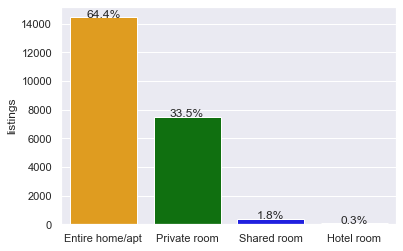

In [15]:
colours = ["orange", "green", "blue","black"]

sns.set(style="darkgrid")
ax = sns.countplot(x="room_type", data=listings,palette=colours)
total = float(len(listings))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
    
ax.set_xlabel('')
ax.set_ylabel('listings')

Based on the chart above we can see that majority of listings (around 64%) are of type “Entire Home/Apt”, followed by "Private rooms" (around 34%), with Others rounding off the remaining 2%.

Let us take a look at the number of listings across different neighbourhoods.

For exploring neighbourhoods, there are 2 columns in the listings data -- neighbourhood and neighbourhood cleansed.

In [16]:
listings['neighbourhood_cleansed'].describe()

count                                 22425
unique                                  140
top       Waterfront Communities-The Island
freq                                   4212
Name: neighbourhood_cleansed, dtype: object

In [17]:
listings['neighbourhood'].describe()

count                22423
unique                 139
top       Downtown Toronto
freq                  5138
Name: neighbourhood, dtype: object

We can see that, the neighbourhood column is having 2 missing rows. So we can use the neighbourhood_cleansed column in further analysis.

Text(0.5, 0, 'listings')

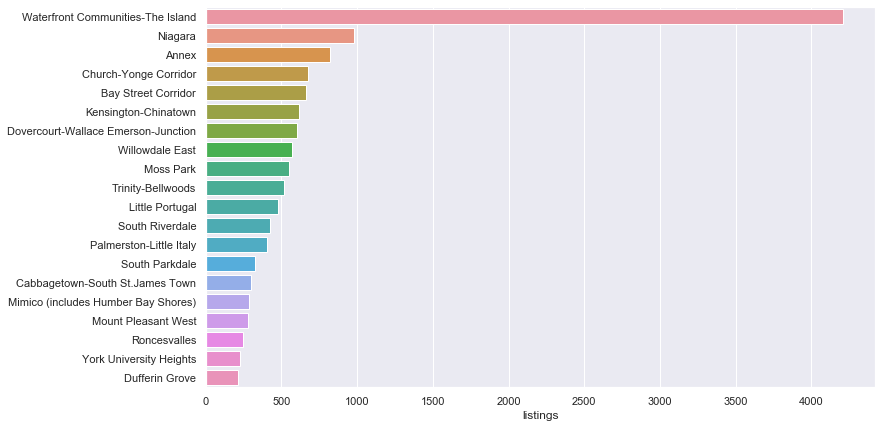

In [18]:
ax = plt.subplots(figsize=(12,7))
ax =sns.countplot(y="neighbourhood_cleansed",  data=listings, order=listings.neighbourhood_cleansed.value_counts().iloc[:20].index)
ax.set_ylabel('')
ax.set_xlabel('listings')

We can see that the Waterfront Communities-The Island neighbourhood is way too ahead in terms of listings, which is understandable as it is a majour Tourist location.

Now let us look at the property type column to understand the different property types available.

In [19]:
listings['property_type'].value_counts().sort_values(ascending = False)

Apartment                 6489
Condominium               6318
House                     5916
Townhouse                 1006
Guest suite                979
Bungalow                   756
Loft                       415
Guesthouse                 119
Villa                       94
Serviced apartment          87
Boutique hotel              70
Bed and breakfast           44
Other                       38
Hostel                      20
Hotel                       19
Tiny house                  11
Cottage                      8
Barn                         7
Boat                         5
Aparthotel                   5
Camper/RV                    4
Earth house                  3
Casa particular (Cuba)       2
Cave                         2
Cabin                        2
Train                        1
Parking Space                1
Farm stay                    1
Castle                       1
Dome house                   1
Resort                       1
Name: property_type, dtype: int64

There are only 3-5 major property types, which are Apartment, Condominium, House, Townhouse, etc. Rest are very few.

In [20]:
#Let us only keep the major property types which has a listings above 1500 and combine everything else
def cut_levels(x, threshold, new_value):
    '''
    Description : a function to combine various levels of a variable which are having occurance 
                   below a threshold value together and label it as others
    Input : x -- the required column
            threshold -- the cut off value
            new_value --- what is the new name for the grouped values
    Output : Make changes in the input data
    '''
    value_counts = x.value_counts()
    labels = value_counts.index[value_counts < threshold]
    x[np.in1d(x, labels)] = new_value

cut_levels(listings.property_type, 1500, 'Others')

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [21]:
listings['property_type'].value_counts().sort_values(ascending = False)

Apartment      6489
Condominium    6318
House          5916
Others         3702
Name: property_type, dtype: int64

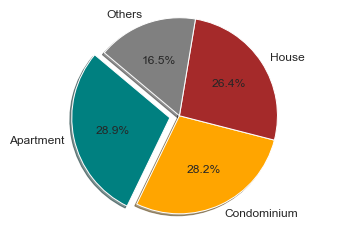

In [22]:
from matplotlib import font_manager as fm
labels = listings.property_type.value_counts().index
sizes = list(listings.property_type.value_counts())
colors = ['teal', 'orange', 'brown', 'grey']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
proptease = fm.FontProperties()
proptease.set_size('medium')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease)
plt.axis('equal')
plt.show()

Now let's look at these in terms of price, to identify the cheaper options.

For that first we have to convert the price column to numeric.

In [23]:
listings['price'] = pd.to_numeric(listings['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')),errors='coerce')

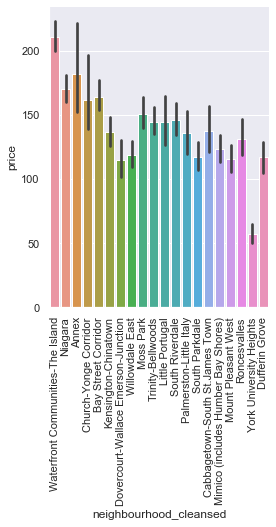

In [24]:
nbd_price_plt=sns.catplot(x='neighbourhood_cleansed', y ='price', data= listings,order=listings.neighbourhood_cleansed.value_counts().iloc[:20].index,kind= 'bar')
nbd_price_plt.set_xticklabels(rotation=90)

So from the graph above we can see that of the top 20 listed neighbourhoods, Annex is the costliest and York University Heights is the cheapest.

Let's take a look at the top 10 costliest and top 10 cheapest neighbourhoods in terms of average price.

In [25]:
nbd_avg_prices = listings.groupby('neighbourhood_cleansed').agg({"price" :[sum,np.mean]})
nbd_avg_prices.columns = ["_".join(x) for x in nbd_avg_prices.columns.ravel()]
nbd_avg_prices.rename(columns={"price_sum": "total_price", "price_mean": "average_price"},inplace = True)
nbd_avg_prices.sort_values('average_price',inplace = True,ascending=False)

In [26]:
top_10_costliest_nbh = nbd_avg_prices.head(10)
top_10_cheapest_nbh =  nbd_avg_prices.tail(10)

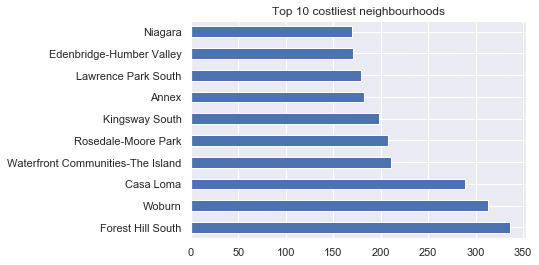

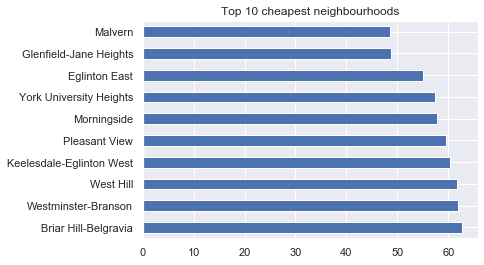

In [27]:
ax =top_10_costliest_nbh.plot.barh(y='average_price',title = 'Top 10 costliest neighbourhoods')
ax.set_ylabel('')
ax.get_legend().remove()
ax =top_10_cheapest_nbh.plot.barh(y='average_price',title = 'Top 10 cheapest neighbourhoods')
ax.set_ylabel('')
ax.get_legend().remove()

We can see that Forest Hill South is the costliest neighbourhood while Malvern is cheapest neighbourhood.

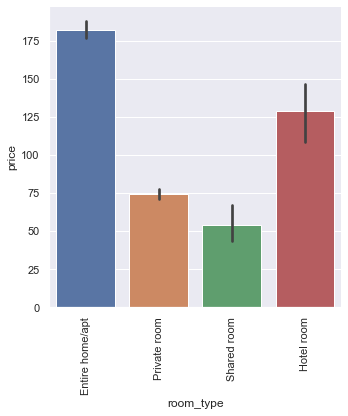

In [28]:
nbd_price_plt=sns.catplot(x='room_type', y ='price', data= listings,order=listings.room_type.value_counts().index,kind= 'bar')
nbd_price_plt.set_xticklabels(rotation=90)

Predictabily,shared rooms are the cheapest option.

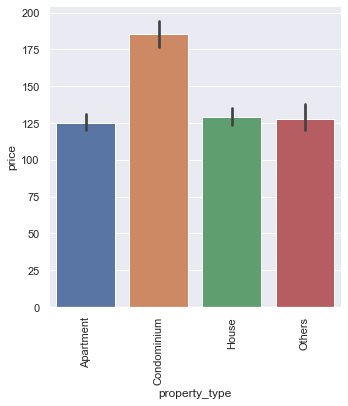

In [29]:
ax=sns.catplot(x='property_type', y ='price', data= listings,order=listings.property_type.value_counts().index,kind= 'bar')
ax.set_xticklabels(rotation=90)

So from the above we can see that condominiums are very costly. Apartments are cheaper.

So I think, now we can answer our second question.

--------------------------------------------------------------------------------------
**"Where do I stay, what all options do I have?"**

We have seen that the listings are spread across Toronto, with most available in the Water Front area.
Listings of type "Entire home/apt" is the highest, but there are alternatives like Private rooms, Shared rooms etc.

If one is looking for a cheaper option, then there are neighbourhoods with cheaper options available. 

We have taken a look at the top 10 costliest and top 10 cheapest neighbourhoods.
The top 10 costliest neighbourhoods are ['Forest Hill South', 'Woburn', 'Casa Loma','Waterfront Communities-The Island', 'Rosedale-Moore Park',
       'Kingsway South', 'Annex', 'Lawrence Park South','Edenbridge-Humber Valley', 'Niagara']
                                              
The top 10 cheapest neighbourhoods are['Briar Hill-Belgravia', 'Westminster-Branson', 'West Hill', 'Keelesdale-Eglinton West', 'Pleasant View', 'Morningside',
       'York University Heights', 'Eglinton East', 'Glenfield-Jane Heights', 'Malvern']

In conclusion, Condominiums are costliest while, Apartments provide a cheaper option. One can also consider Shared rooms as a viable alternative based on individual preference.

---------------------------------------------------------------------------------------


Now that we have answered our seecond question, let's look at the 3rd question.

### 3. What all amenities I should be expecting?

For that let's take a look at the amenities column.

In [30]:
listings['amenities'].head(2)

0    {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
1    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
Name: amenities, dtype: object

We can see that the amenities column is not how we want. So to see the distribution, we have to clean it.

In [31]:
#we are replacing the brackets, quotes etc and use "|" as a sperator between different amenities

listings['amenities'] = listings['amenities'].map(lambda x: "|".join([y.replace("{","").replace("}","")
                                                          .replace('"',"") for y in x.split(',')]))

In [32]:
# Now we have have to replace the "|" and create a new dataframe with id column and the amenities column with each amenity separated.
amenities_df = pd.DataFrame(listings.amenities.str.split('|').tolist(),index=listings.id).stack()
amenities_df = amenities_df.reset_index([0, 'id'])
amenities_df.columns = ['id','amenities']
amenities_df.head()

,id,amenities
0,1419,TV
1,1419,Internet
2,1419,Wifi
3,1419,Air conditioning
4,1419,Kitchen


In [33]:
amenities_df.drop_duplicates()
amenities_df.shape

(591071, 2)

Let's see some of the most commonly listed amenities.

Text(0.5, 0, '')

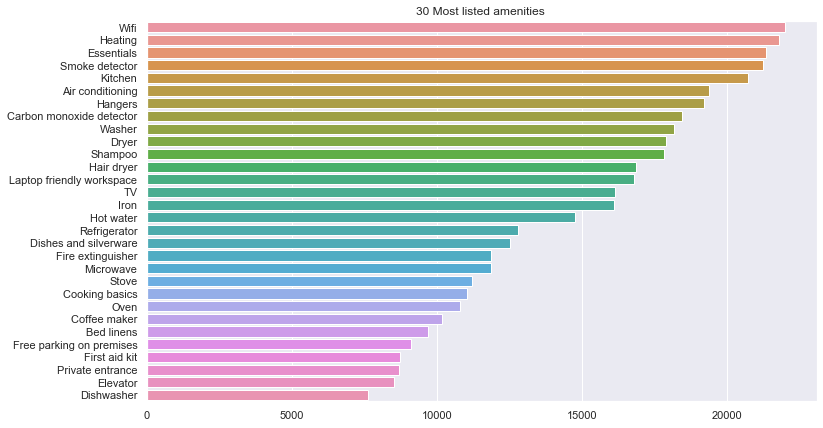

In [34]:
ax = plt.subplots(figsize=(12,7))
ax =sns.countplot(y="amenities",  data=amenities_df, order=amenities_df.amenities.value_counts().iloc[:30].index)
ax.title.set_text('30 Most listed amenities ')
ax.set_ylabel('')
ax.set_xlabel('')

Text(0.5, 0, '')

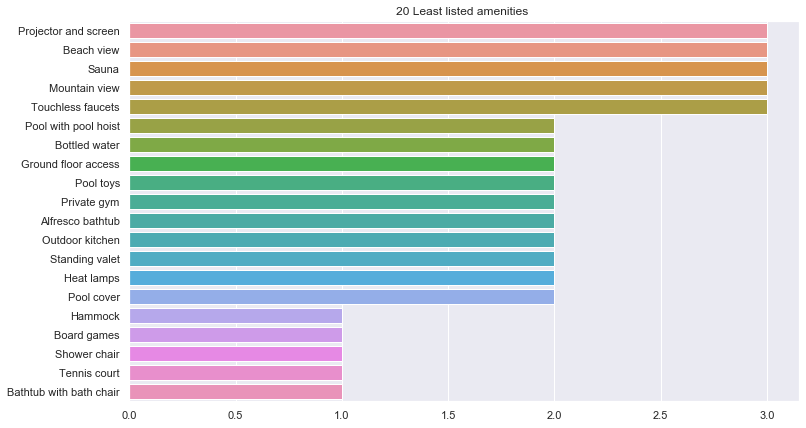

In [36]:
ax = plt.subplots(figsize=(12,7))
ax =sns.countplot(y="amenities",  data=amenities_df, order=amenities_df.amenities.value_counts().iloc[-20:].index)
ax.title.set_text('20 Least listed amenities ')
ax.set_ylabel('')
ax.set_xlabel('')

So to answer our 3rd question, 

---------------------------------------------------------------------------------------------------------
**What all amenities I should be expecting?**

From the above charts we can see that, basic amenities like Wifi, Heating, Essentials,Smoke detector, Kitchen, Air conditioning etc are most commonly mentioned amenities in any listing. So we can expect all these amenities almost everywhere.
There are some amenities which are very not that common , for eg : Sauna,Private pool, private gym, Tennis Court to name a few etc. 

Again preference of ameneties is a matter of personal choice. All we can conclude is that certain amenities are common across all listings and any traveller should consider them as bare minimum while taking a decision.  

--------------------------------------------------------------------------------------------------------

## 3. Data Preparation

Now that we have answered 3 of our questions, we will move to the 4th question **"In general, what all factors are driving the price?**". To answer this , let's prepare our data for modeling in the below section.

Let us look at the missing values in the data.

In [37]:
missing_percent= listings.isna().mean().round(4) * 100
missing_percent.sort_values(ascending=False)

thumbnail_url                                   100.00
neighbourhood_group_cleansed                    100.00
medium_url                                      100.00
xl_picture_url                                  100.00
jurisdiction_names                              100.00
license                                          99.99
square_feet                                      99.39
monthly_price                                    93.25
weekly_price                                     92.02
notes                                            55.55
access                                           43.77
host_about                                       43.29
interaction                                      37.63
neighborhood_overview                            35.08
transit                                          34.68
house_rules                                      32.91
host_response_rate                               30.98
host_response_time                               30.98
space     

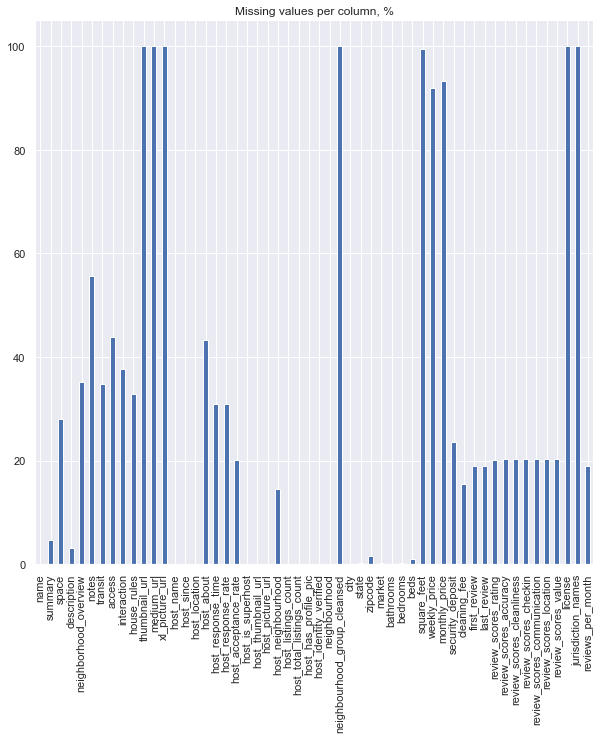

In [38]:
plt.figure(figsize=(10,10)) 
listings_missing_data = listings.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_data[listings_missing_data > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %')

There are many columns with lots of missing values. For the simplicity of the analysis, I am dropping columns with more than 20% missing values.

In [39]:
to_drop_columns = missing_percent[missing_percent>20]
to_drop_columns = to_drop_columns.index.tolist()
print("Columns to be dropped:\n {}".format(to_drop_columns))

Columns to be dropped:
 ['space', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'jurisdiction_names']


Maybe we can keep host_response_rate and review_scores_rating as they may impact the price.

In [40]:
to_drop_columns.remove('host_response_rate')
to_drop_columns.remove('review_scores_rating')
to_drop_columns

['space',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'xl_picture_url',
 'host_about',
 'host_response_time',
 'host_acceptance_rate',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'license',
 'jurisdiction_names']

In [41]:
#Dropping the columns
listings_new = listings.drop(to_drop_columns,axis =1)
listings_new.shape

(22425, 80)

Still there are lots of columns which can be removed. For eg: Columns containing host informations such as host_name, host_location etc can be dropped.
   
Let's take a look at all the categorical columns.For that we can filter for type = object.

In [43]:
listings_cat = listings_new.select_dtypes(include=['object'])
cat_col = listings_cat.columns
cat_col

Index(['listing_url', 'last_scraped', 'name', 'summary', 'description',
       'experiences_offered', 'picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

From this let us keep only required columns.

In [44]:
cat_col_to_drop = ['listing_url', 'last_scraped', 'name', 'summary', 'description',
       'experiences_offered', 'picture_url', 'host_url', 'host_name',
       'host_location', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'calendar_updated', 'calendar_last_scraped', 'first_review', 'last_review']

In [45]:
listings_new.drop(cat_col_to_drop,axis =1,inplace = True)
listings_new.shape

(22425, 50)

We can also drop some of the numeric columns which are not required for our analysis or for which there are other similar columns which exists in the data.

In [46]:
drop_cols =['id','scrape_id', 'host_id', 'host_total_listings_count',
         'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [47]:
listings_new.drop(drop_cols,axis =1,inplace = True)
listings_new.shape

(22425, 36)

Now let us look at the correlation of numeric variables using a correlation heat map.

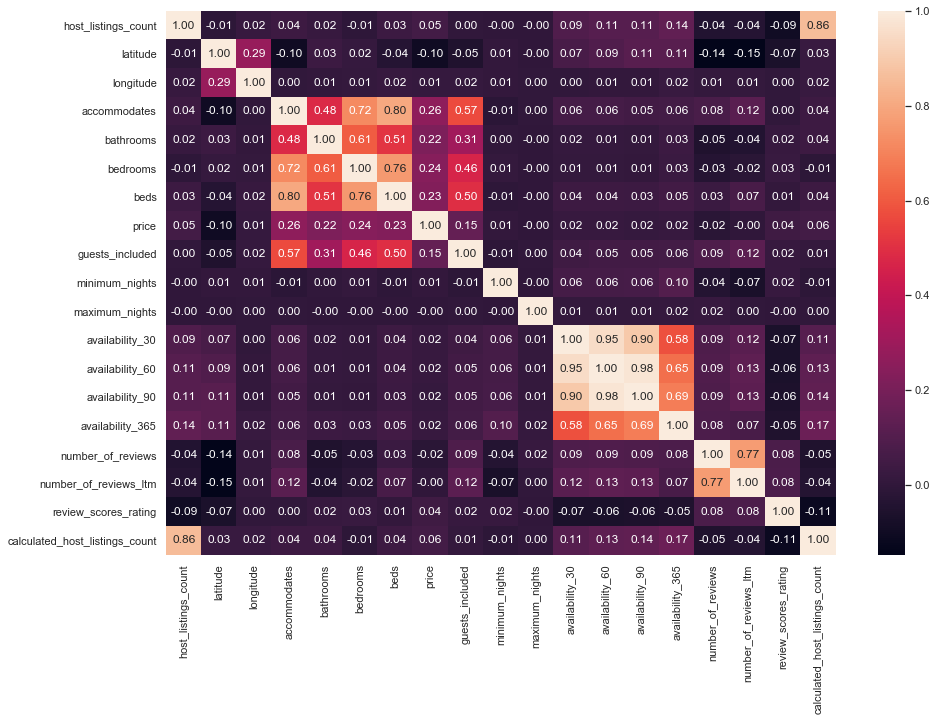

In [48]:
#let us plot a correlation heat map
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(listings_new.corr(), annot=True, fmt='.2f');

From the above we can see that there are some high intercorrelated variables in there. So I am going to drop variables which are having intercorrelation > 0.6.

In [49]:
High_corr_vars = ['accommodates','beds','availability_30','availability_60','availability_90','calculated_host_listings_count','number_of_reviews_ltm']

In [50]:
listings_new.drop(High_corr_vars,axis =1,inplace = True)
listings_new.shape

(22425, 29)

Now let us look at the distribution of price across Toronto.

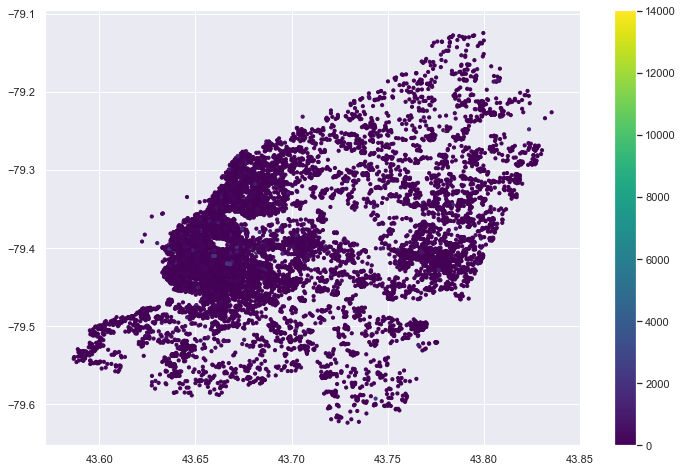

In [51]:
plt.figure(figsize=(12,8))
points = plt.scatter(listings_new['latitude'], listings_new['longitude'], c=listings_new["price"], s=10, cmap="viridis") 
plt.colorbar(points)

From the above plot we can see that most of the price range is between 0 to 2000 . Let us confirm that using a swarmplot.

count    22425.000000
mean       143.532040
std        271.454726
min          0.000000
25%         64.000000
50%         99.000000
75%        159.000000
max      14008.000000
Name: price, dtype: float64

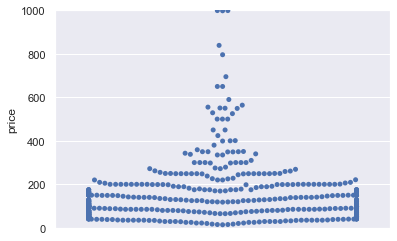

In [52]:
display(listings_new.price.describe())

ax = sns.swarmplot(y=listings_new.price.sample(600));
ax.set(ylim=(0,1000));

In [53]:
count_gt_600 = listings_new[listings_new['price']>600]
print("Number of listings which has a price greater than 600 is {}".format(count_gt_600['price'].count()))

Number of listings which has a price greater than 600 is 364


So from the above we can see that most of the price ranges between 0 to 200. ie 75% of data has a price <= 159 .
To get some of the high prices, we can take a cut off of 600. ie, For the analysis we can consider that price above 600 as outliers. Also there are just 364 listings which has a price above 600.

Let's take a subset of the price to look at the spread of price.

In [54]:
listings_subset = listings_new[listings_new['price']<600]

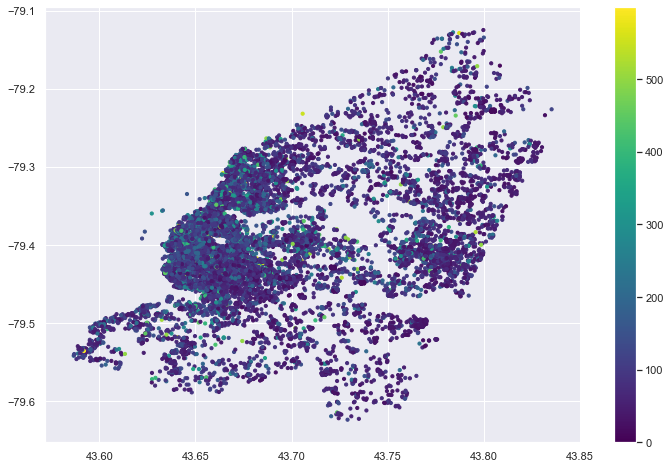

In [55]:
plt.figure(figsize=(12,8))
points = plt.scatter(listings_subset['latitude'], listings_subset['longitude'], c=listings_subset["price"], s=10, cmap="viridis") 
plt.colorbar(points)

From this we can see that there a lot of cheaper options available.

In [56]:
listings_cat = listings_new.select_dtypes(include=['object'])
listings_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22425 entries, 0 to 22424
Data columns (total 17 columns):
host_since                          22421 non-null object
host_response_rate                  15478 non-null object
host_is_superhost                   22421 non-null object
neighbourhood_cleansed              22425 non-null object
property_type                       22425 non-null object
room_type                           22425 non-null object
bed_type                            22425 non-null object
amenities                           22425 non-null object
cleaning_fee                        18938 non-null object
extra_people                        22425 non-null object
has_availability                    22425 non-null object
requires_license                    22425 non-null object
instant_bookable                    22425 non-null object
is_business_travel_ready            22425 non-null object
cancellation_policy                 22425 non-null object
require_guest_profile

We can now drop latitude and longitude. Also I am dropping cleaning_fee as it is not useful in predicting price.

In [57]:
drop_vars = ['latitude','cleaning_fee','longitude']
listings_new.drop(drop_vars,axis =1,inplace = True)
listings_new.shape

(22425, 26)

Now we have to convert some of the categorical vars. 

Converting the host_since variable to date type.

In [58]:
listings_new['host_since']= pd.to_datetime(listings_new['host_since']) 

Create a variable with current date

In [59]:
from datetime import date 
curr_date = date.today() 
listings_new['curr_date']=curr_date
listings_new['curr_date']= pd.to_datetime(listings_new['curr_date']) 
listings_new['curr_date'].head()

0   2020-05-16
1   2020-05-16
2   2020-05-16
3   2020-05-16
4   2020-05-16
Name: curr_date, dtype: datetime64[ns]

Create a new variable time_since_host as the difference in days from the current period to when that person became a host.

In [60]:
listings_new['time_since_host']= listings_new['curr_date']-listings_new['host_since']
listings_new['time_since_host']=listings_new['time_since_host']/np.timedelta64(1,'D')

listings_new['time_since_host'].describe()

count    22421.000000
mean      1486.792873
std        848.823065
min         39.000000
25%        766.000000
50%       1481.000000
75%       2072.000000
max       4299.000000
Name: time_since_host, dtype: float64

Now we have to look at some of the categorigal values. We need to transform them. First let us transform the amenities column.

There are lot of amenities. We can keep amenities which are mentioned atleast 5000 times in the listings.

In [61]:
new_df = amenities_df.groupby('amenities').filter(lambda x: len(x) >5000)
new_df['amenities'].value_counts()

Wifi                          21992
Heating                       21797
Essentials                    21332
Smoke detector                21250
Kitchen                       20722
Air conditioning              19374
Hangers                       19215
Carbon monoxide detector      18460
Washer                        18161
Dryer                         17905
Shampoo                       17845
Hair dryer                    16853
Laptop friendly workspace     16783
TV                            16140
Iron                          16123
Hot water                     14745
Refrigerator                  12783
Dishes and silverware         12514
Fire extinguisher             11863
Microwave                     11853
Stove                         11218
Cooking basics                11049
Oven                          10812
Coffee maker                  10188
Bed linens                     9691
Free parking on premises       9120
First aid kit                  8740
Private entrance            

In [62]:
keep_list = list(np.unique(new_df['amenities'].values))
keep_list

['Air conditioning',
 'Bed linens',
 'Carbon monoxide detector',
 'Coffee maker',
 'Cooking basics',
 'Dishes and silverware',
 'Dishwasher',
 'Dryer',
 'Elevator',
 'Essentials',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'First aid kit',
 'Free parking on premises',
 'Gym',
 'Hair dryer',
 'Hangers',
 'Heating',
 'Hot water',
 'Iron',
 'Kitchen',
 'Laptop friendly workspace',
 'Lock on bedroom door',
 'Long term stays allowed',
 'Microwave',
 'Oven',
 'Paid parking off premises',
 'Patio or balcony',
 'Private entrance',
 'Refrigerator',
 'Self check-in',
 'Shampoo',
 'Smoke detector',
 'Stove',
 'TV',
 'Washer',
 'Wifi']

Now creating dummy variables for the amenities.

In [63]:
dummies= listings_new['amenities'].str.get_dummies(sep='|')
dummies.head()

,toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Alfresco bathtub,Amazon Echo,BBQ grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Balcony,Barbecue utensils,Bath towel,Bathroom essentials,Bathtub,Bathtub with bath chair,Beach essentials,Beach view,Beachfront,Bed linens,Bedroom comforts,Bidet,Board games,Body soap,Bottled water,Bread maker,Breakfast,Breakfast table,Building staff,Buzzer/wireless intercom,Cable TV,Carbon monoxide detector,Cat(s),Ceiling fan,Central air conditioning,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Convection oven,Cooking basics,Crib,DVD player,Day bed,Disabled parking spot,Dishes and silverware,Dishwasher,Dog(s),Doorman,Double oven,Dryer,EV charger,Elevator,En suite bathroom,Espresso machine,Essentials,Ethernet connection,Exercise equipment,Extra pillows and blankets,Extra space around bed,Family/kid friendly,Fax machine,Fire extinguisher,Fire pit,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower,Fixed grab bars for toilet,Flat path to guest entrance,Formal dining area,Free parking on premises,Free street parking,Full kitchen,Game console,Garden or backyard,Gas oven,Ground floor access,Gym,HBO GO,Hair dryer,Hammock,Handheld shower head,Hangers,Heat lamps,Heated floors,Heated towel rack,Heating,High chair,High-resolution computer monitor,Host greets you,Hot tub,Hot water,Hot water kettle,Indoor fireplace,Internet,Iron,Jetted tub,Keypad,Kitchen,Kitchenette,Lake access,Laptop friendly workspace,Lock on bedroom door,Lockbox,Long term stays allowed,Luggage dropoff allowed,Memory foam mattress,Microwave,Mini fridge,Mountain view,Mudroom,Murphy bed,Netflix,No stairs or steps to enter,Other,Other pet(s),Outdoor kitchen,Outdoor parking,Outdoor seating,Outlet covers,Oven,Pack ’n Play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Pets allowed,Pets live on this property,Pillow-top mattress,Pocket wifi,Pool,Pool cover,Pool toys,Pool with pool hoist,Printer,Private bathroom,Private entrance,Private gym,Private hot tub,Private living room,Private pool,Projector and screen,Rain shower,Refrigerator,Room-darkening shades,Safety card,Sauna,Self check-in,Shampoo,Shared gym,Shared hot tub,Shared pool,Shower chair,Shower gel,Single level home,Ski-in/Ski-out,Smart TV,Smart lock,Smoke detector,Smoking allowed,Soaking tub,Sound system,Stair gates,Stand alone steam shower,Standing valet,Steam oven,Step-free shower,Stove,Suitable for events,Sun loungers,TV,Table corner guards,Tennis court,Terrace,Toilet paper,Touchless faucets,Trash can,Walk-in shower,Warming drawer,Washer,Washer/Dryer,Waterfront,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance,Wide entrance for guests,Wide entryway,Wide hallways,Wifi,Window guards,Wine cooler,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

From that we can keep only those amenities which are mentioned atleast 5000 times in the listings.

In [64]:
amenities = dummies[['Air conditioning',
 'Bed linens',
 'Carbon monoxide detector',
 'Coffee maker',
 'Cooking basics',
 'Dishes and silverware',
 'Dishwasher',
 'Dryer',
 'Elevator',
 'Essentials',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'First aid kit',
 'Free parking on premises',
 'Gym',
 'Hair dryer',
 'Hangers',
 'Heating',
 'Hot water',
 'Iron',
 'Kitchen',
 'Laptop friendly workspace',
 'Lock on bedroom door',
 'Long term stays allowed',
 'Microwave',
 'Oven',
 'Paid parking off premises',
 'Patio or balcony',
 'Private entrance',
 'Refrigerator',
 'Self check-in',
 'Shampoo',
 'Smoke detector',
 'Stove',
 'TV','Washer',
 'Wifi']]

In [65]:
amenities.shape

(22425, 38)

Now we need to add this back to our lisings data.

In [66]:
listings_new.drop('amenities',axis=1,inplace=True)
listings_new = pd.concat([listings_new, amenities], axis=1)
listings_new.head()

,host_since,host_response_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,bed_type,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,curr_date,time_since_host,Air conditioning,Bed linens,Carbon monoxide detector,Coffee maker,Cooking basics,Dishes and silverware,Dishwasher,Dryer,Elevator,Essentials,Extra pillows and blankets,Family/kid friendly,Fire extinguisher,First aid kit,Free parking on premises,Gym,Hair dryer,Hangers,Heating,Hot water,Iron,Kitchen,Laptop friendly workspace,Lock on bedroom door,Long term stays allowed,Microwave,Oven,Paid parking off premises,Patio or balcony,Private entrance,Refrigerator,Self check-in,Shampoo,Smoke detector,Stove,TV,Washer,Wifi
0,2008-08-08,NaN,f,1.0,Little Portugal,House,Entire home/apt,3.0,5.0,Real Bed,469.0,1,$0.00,4,730,t,0,7,100.0,f,f,f,strict_14_with_grace_period,f,f,2020-05-16,4299.0,1,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1
1,2009-06-22,NaN,f,2.0,Waterfront Communities-The Island,Apartment,Private room,1.5,1.0,Real Bed,105.0,1,$0.00,180,365,t,0,169,97.0,f,t,f,strict_14_with_grace_period,f,t,2020-05-16,3981.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
2,2009-10-25,NaN,f,1.0,Annex,House,Private room,1.5,1.0,Pull-out Sofa,70.0,1,$21.00,1,10,t,0,0,NaN,f,f,f,moderate,f,f,2020-05-16,3856.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2010-03-15,NaN,f,2.0,Briar Hill-Belgravia,House,Private room,1.0,1.0,Real Bed,73.0,2,$20.00,1,28,t,57,217,95.0,f,t,f,strict_14_with_grace_period,f,f,2020-05-16,3715.0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1
4,2010-04-25,90%,f,7.0,Waterfront Communities-The Island,Condominium,Entire home/apt,1.0,1.0,Real Bed,169.0,2,$18.00,4,730,t,365,40,95.0,f,f,f,strict_14_with_grace_period,f,f,2020-05-16,3674.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1


In [67]:
listings_cat = listings_new.select_dtypes(include=['object'])
listings_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22425 entries, 0 to 22424
Data columns (total 14 columns):
host_response_rate                  15478 non-null object
host_is_superhost                   22421 non-null object
neighbourhood_cleansed              22425 non-null object
property_type                       22425 non-null object
room_type                           22425 non-null object
bed_type                            22425 non-null object
extra_people                        22425 non-null object
has_availability                    22425 non-null object
requires_license                    22425 non-null object
instant_bookable                    22425 non-null object
is_business_travel_ready            22425 non-null object
cancellation_policy                 22425 non-null object
require_guest_profile_picture       22425 non-null object
require_guest_phone_verification    22425 non-null object
dtypes: object(14)
memory usage: 2.4+ MB


Now let's look at each and every categorical columns to identify what kind of transformation it needs.

In [68]:
listings_new['host_response_rate'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    90%
Name: host_response_rate, dtype: object

We need to convert it to numeric type. For that we have remove the "%" from the values.

In [69]:
listings_new.host_response_rate = listings_new.host_response_rate.str.replace("%", "")
listings_new.host_response_rate = pd.to_numeric(listings_new.host_response_rate)
listings_new['host_response_rate'].head()

0     NaN
1     NaN
2     NaN
3     NaN
4    90.0
Name: host_response_rate, dtype: float64

In [70]:
listings_new['extra_people'].head()

0     $0.00
1     $0.00
2    $21.00
3    $20.00
4    $18.00
Name: extra_people, dtype: object

In [71]:
listings_new.extra_people = listings_new.extra_people.str.replace("$", "")
listings_new.extra_people = pd.to_numeric(listings_new.extra_people);

In [72]:
#Dropping host_since variable and curr_date variable, as we have created a new variable from these two.
listings_new.drop('host_since',axis=1,inplace=True)
listings_new.drop('curr_date',axis=1,inplace=True)

In [73]:
listings_cat = listings_new.select_dtypes(include=['object'])
listings_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22425 entries, 0 to 22424
Data columns (total 12 columns):
host_is_superhost                   22421 non-null object
neighbourhood_cleansed              22425 non-null object
property_type                       22425 non-null object
room_type                           22425 non-null object
bed_type                            22425 non-null object
has_availability                    22425 non-null object
requires_license                    22425 non-null object
instant_bookable                    22425 non-null object
is_business_travel_ready            22425 non-null object
cancellation_policy                 22425 non-null object
require_guest_profile_picture       22425 non-null object
require_guest_phone_verification    22425 non-null object
dtypes: object(12)
memory usage: 2.1+ MB


In [75]:
chk_cols = listings_new[['host_is_superhost','has_availability','requires_license','instant_bookable','is_business_travel_ready','require_guest_profile_picture','require_guest_phone_verification']]
chk_cols.head()

,host_is_superhost,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,f,t,f,f,f,f,f
1,f,t,f,t,f,f,t
2,f,t,f,f,f,f,f
3,f,t,f,t,f,f,f
4,f,t,f,f,f,f,f


All these columns are of 't' or'f' type. We have to make them into boolean values.

In [76]:
for feat in ['host_is_superhost','has_availability','requires_license','instant_bookable','is_business_travel_ready','require_guest_profile_picture','require_guest_phone_verification']:
    listings_new[feat] =listings_new[feat].map(lambda x: True if x == 't' else False)

In [77]:
listings_cat = listings_new.select_dtypes(include=['object'])
listings_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22425 entries, 0 to 22424
Data columns (total 5 columns):
neighbourhood_cleansed    22425 non-null object
property_type             22425 non-null object
room_type                 22425 non-null object
bed_type                  22425 non-null object
cancellation_policy       22425 non-null object
dtypes: object(5)
memory usage: 876.1+ KB


Now we have just 5 more columns to transform. Out of that we can see that neighbourhood_cleansed column is highly skewed. Since majority of the listings are in Waterfront-Islands, it's better to drop the neighbourhood_cleansed column from analysis. 

Let us look at the bed_type column.

In [78]:
listings_new.drop('neighbourhood_cleansed',axis=1,inplace=True)

In [79]:
listings_new['bed_type'].value_counts()

Real Bed         22179
Futon              117
Pull-out Sofa       73
Airbed              28
Couch               28
Name: bed_type, dtype: int64

Eventhough most of the bed_type is of real bed, we can keep others as well as there are just 5 different categories.

We can create dummy vars for these vars.

In [80]:
for feat in ['property_type','room_type','bed_type','cancellation_policy']:
    listings_new = pd.concat([listings_new, pd.get_dummies(listings_new[feat],prefix = feat, prefix_sep='_')],axis=1)
    listings_new.drop(feat,axis=1,inplace=True)

In [81]:
listings_new.head()

,host_response_rate,host_is_superhost,host_listings_count,bathrooms,bedrooms,price,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_365,number_of_reviews,review_scores_rating,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,time_since_host,Air conditioning,Bed linens,Carbon monoxide detector,Coffee maker,Cooking basics,Dishes and silverware,Dishwasher,Dryer,Elevator,Essentials,Extra pillows and blankets,Family/kid friendly,Fire extinguisher,First aid kit,Free parking on premises,Gym,Hair dryer,Hangers,Heating,Hot water,Iron,Kitchen,Laptop friendly workspace,Lock on bedroom door,Long term stays allowed,Microwave,Oven,Paid parking off premises,Patio or balcony,Private entrance,Refrigerator,Self check-in,Shampoo,Smoke detector,Stove,TV,Washer,Wifi,property_type_Apartment,property_type_Condominium,property_type_House,property_type_Others,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,NaN,False,1.0,3.0,5.0,469.0,1,0.0,4,730,True,0,7,100.0,False,False,False,False,False,4299.0,1,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,NaN,False,2.0,1.5,1.0,105.0,1,0.0,180,365,True,0,169,97.0,False,True,False,False,True,3981.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,NaN,False,1.0,1.5,1.0,70.0,1,21.0,1,10,True,0,0,NaN,False,False,False,False,False,3856.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,NaN,False,2.0,1.0,1.0,73.0,2,20.0,1,28,True,57,217,95.0,False,True,False,False,False,3715.0,1,1,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4,90.0,False,7.0,1.0,1.0,169.0,2,18.0,4,730,True,365,40,95.0,False,False,False,False,False,3674.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [82]:
listings_cat = listings_new.select_dtypes(include=['object'])
listings_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22425 entries, 0 to 22424
Empty DataFrame

Finally we have transformed all categorical columns. Also as discussed we can drop the outlier prices to get an unbiased prediction for price.

In [83]:
listings_clean = listings_new[listings_new['price'] <= 600]
listings_clean.shape

(22061, 76)

Now let's look at the missing values

In [86]:
listings_clean.columns[listings_clean.isnull().any()]

Index(['host_response_rate', 'host_listings_count', 'bathrooms', 'bedrooms',
       'review_scores_rating', 'time_since_host'],
      dtype='object')

From the above we can see that there are only 6 columns with missing values. For simplicity, I am imputing all with median value. For that I am using Imputer from sklearn.

In [89]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')
names = listings_clean.columns.values
listings_final = pd.DataFrame(imputer.fit_transform(listings_clean), columns=names)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [91]:
listings_final.columns[listings_final.isnull().any()]

Index([], dtype='object')

Now that we have a cleaned and transformed data, our dataset is ready for modeling.

## 4. Modeling and 5. Evaluation

So now that our data is clean and imputed, we can proceed with the modeling steps.

We can try to find answer to our last and final question in this section.

### 4. In general, what are the factors having greatest impact on price?

In [92]:
listings_final.shape

(22061, 76)

In [93]:
#I am using a function which we used in the lesson

def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.figsize=((10,10))
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

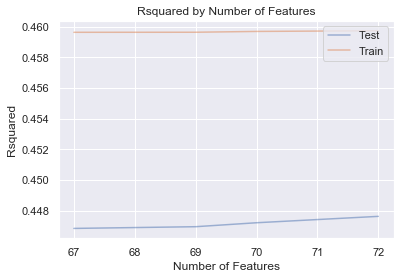

In [94]:
X = listings_final.drop(['price'],axis=1)
y = listings_final['price']
cutoffs = [100,75, 50,35,25,15]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X,y, cutoffs)

In [95]:
print("The number of columns in training set is: {}.".format(X_train.shape[1])) #Number of columns
print("The R squared score for the test set is: {}.".format(r2_scores_test[np.argmax(r2_scores_test)])) # The model we should implement test_r2
print("The R squared score for the training set is: {}.".format(r2_scores_train[np.argmax(r2_scores_test)])) # The model we should implement train_r2

The number of columns in training set is: 72.
The R squared score for the test set is: 0.4476315721618559.
The R squared score for the training set is: 0.4597397536694603.


In [97]:
# Now lets take a look at the coefficients by using a function which we  an earlier lesson.
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

coefs_df = coef_weights(lm_model.coef_, X_train)
coefs_df.head(10)

,est_int,coefs,abs_coefs
9,has_availability,4.564541e+13,4.564541e+13
62,room_type_Shared room,-4.414115e+13,4.414115e+13
61,room_type_Private room,-4.414115e+13,4.414115e+13
60,room_type_Hotel room,-4.414115e+13,4.414115e+13
59,room_type_Entire home/apt,-4.414115e+13,4.414115e+13
55,property_type_Apartment,-4.382641e+13,4.382641e+13
58,property_type_Others,-4.382641e+13,4.382641e+13
57,property_type_House,-4.382641e+13,4.382641e+13
56,property_type_Condominium,-4.382641e+13,4.382641e+13
64,bed_type_Couch,3.141476e+13,3.141476e+13


Let us try to see if we could improve the model using a Random Forest Regresser model.

In [98]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_predictions = rf_model.predict(X_train)
y_test_predictions = rf_model.predict(X_test)

# Calculate the R2 scores for both data sets
r2_train = r2_score(y_train, y_train_predictions)
r2_test = r2_score(y_test, y_test_predictions)
print("Testing Data: R2 = {}".format(r2_test))

Testing Data: R2 = 0.5273498444715699


We can see that R2 for the test data has improved with this model. Let us see, if we could improve it further by using a Random search for hypertuning the parameters.

In [99]:
print("\nThe parameters of the initial Random Forest Regressor model are:\n")
print(rf_model.get_params())


The parameters of the initial Random Forest Regressor model are:

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [100]:
# Set the random search grid
random_grid = {'n_estimators': [100, 200, 400, 600],
           'max_features': ['auto', 'sqrt'],
           'max_depth': [5, 10, 50, 100, None],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4],
           'bootstrap': [True, False]}

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 12.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...e

In [101]:
y_train_predictions = rf_random.predict(X_train)
y_test_predictions = rf_random.predict(X_test)

# Calculate the R2 scores for both data sets
r2_train = r2_score(y_train, y_train_predictions)
r2_test = r2_score(y_test, y_test_predictions)
print("Testing Data: R2 = {}".format(r2_test))

Testing Data: R2 = 0.5487402801006642


We can see that the R2 has improved further. Now let us see the feature importance

Text(0.5, 0, 'Feature Importance Score')

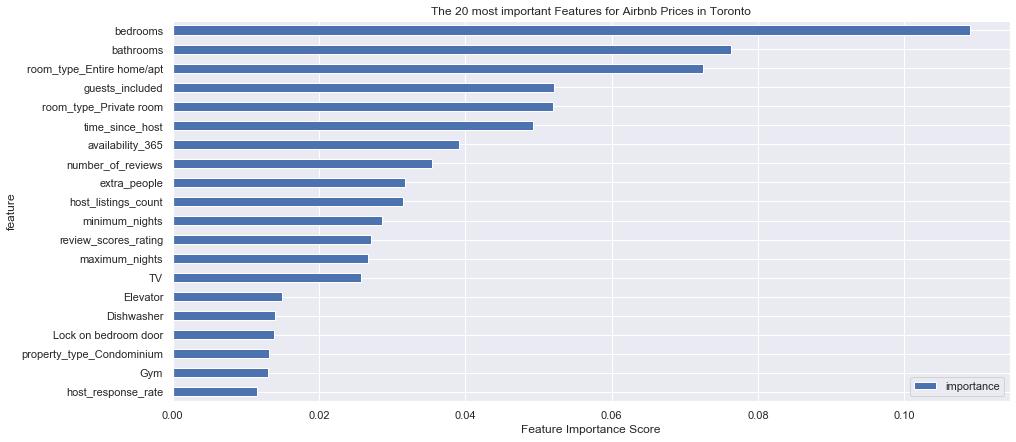

In [102]:
best_random = rf_random.best_estimator_
feat_imp = pd.DataFrame({'importance':best_random.feature_importances_})    
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp = feat_imp.iloc[:20]
feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
figsize=(15, 7)
feat_imp.plot.barh(title="The 20 most important Features for Airbnb Prices in Toronto", figsize=figsize)
plt.xlabel('Feature Importance Score')

So to answer our 4th question, 

---------------------------------------------------------------------------------------------------------
**In general, what are the factors having greatest impact on price?**

From the above we can see that no. of bedrooms is the most important feature in predicting price.

No. of bedrooms, no of bathrooms, different room_types like entire home/apt or private rooms etc,time since host - since when did the host started listing in AirBnb, availability, amenities like TV, elevator,Lock on bedroom door, gym etc, property_type, response rate of the host etc play an important role in predicting price.

--------------------------------------------------------------------------------------------------------

## Conclusion

So through this project we have followed CRISP DM process in analysisng AirBnb Toronto data. We have found answers to some of the questions we had like When to visit?, Where to stay?, What all amenities should I expect and In general what all factors impact price.

We have seen that this year, if we choose Jun or Nov, we will get a cheaper option. We have seen that listings are spread all over Toronto, with Waterfront-Islands neighbourhood having the most listings.
Most of the listings are of type Entire home/apt type. Condominiums are costliest. We can expect all the basic amenities like, TV, Wifi, Heating, Essentials etc in almost all the listings.

Finally we have seen that No.of bedrooms, bathrooms, time since host etc. are some of the important factors in predicting price.

#### External Resources

In this project when ever I was stuck at some steps or found issues with some steps, I took the help of Google and found out some very helful resources.  Please find below some of those...

1.https://python-visualization.github.io/folium/modules.html

2.https://medium.com/@sureshssarda/pandas-splitting-exploding-a-column-into-multiple-rows-b1b1d59ea12e

3.https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74